In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA
from pycytominer.cyto_utils import infer_cp_features
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import data_selection as ds
from utils import eval

The best performing Consensus file from LINCS is:
2016_04_01_a549_48hr_batch1_consensus_median_feature_select_dmso.csv.gz
We compare this to the spherized consensus files.
2016_04_01_a549_48hr_batch1_dmso_spherized_profiles_with_input_normalized_by_dmso_consensus_median.csv.gz
Next, I apply my own feature select and improve the score more.

In [2]:
df = pd.read_csv('2016_04_01_a549_48hr_batch1_consensus_median_feature_select_dmso.csv.gz')
df = ds.clean_moas(df)
df = ds.drop_feats(df, 40)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
e = eval.evaluation(df, features=features, meta_features=meta_features)
mad_pre = eval.prec_mean(e.eval(df, operation = 'precision_recall'))
mad_pre_r = e.eval(df, operation = 'precision_recall', eval_range='R').precision.mean()
mad_hit = eval.hitk_prep(e.eval(df, operation = 'hitk'))
mad_enr = e.eval(df, operation = 'enrichment')

dropped 60 features


In [3]:
name = 'sph'
df = pd.read_csv('2016_04_01_a549_48hr_batch1_dmso_spherized_profiles_with_input_normalized_by_dmso_consensus_median.csv.gz')
df = ds.clean_moas(df)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
e = eval.evaluation(df, features=features, meta_features=meta_features)
exec(name + "_pre = eval.prec_mean(e.eval(df, operation = 'precision_recall'))")
exec(name + "_pre_r = e.eval(df, operation = 'precision_recall', eval_range='R').precision.mean()")
exec(name + "_hit = eval.hitk_prep(e.eval(df, operation = 'hitk'))")
exec(name + "_enr = e.eval(df, operation = 'enrichment')")

In [4]:
mad_enr

,enrichment_percentile,threshold,ods_ratio,p-value
0,0.995,0.713842,13.487128,0.000000e+00
1,0.990,0.668273,8.654418,0.000000e+00
2,0.985,0.637999,6.722285,0.000000e+00
3,0.980,0.613314,5.595199,0.000000e+00
4,0.975,0.592521,4.902130,0.000000e+00
5,0.970,0.574567,4.430372,0.000000e+00
6,0.965,0.558293,4.000486,1.353740e-321
7,0.960,0.543579,3.727163,8.629954e-312


In [5]:
sph_enr

,enrichment_percentile,threshold,ods_ratio,p-value
0,0.995,0.359558,11.748352,0.0
1,0.990,0.288638,9.282910,0.0
2,0.985,0.249438,7.563054,0.0
3,0.980,0.222076,6.212779,0.0
4,0.975,0.202358,5.463448,0.0
5,0.970,0.186417,4.883937,0.0
6,0.965,0.173657,4.429423,0.0
7,0.960,0.162612,4.112655,0.0


0.056404115953036016

In [6]:
print(f"P@R mad: {mad_pre_r}")
print(f"P@R sph: {sph_pre_r}")

P@R mad: 0.06703344559051595
P@R sph: 0.056404115953036016


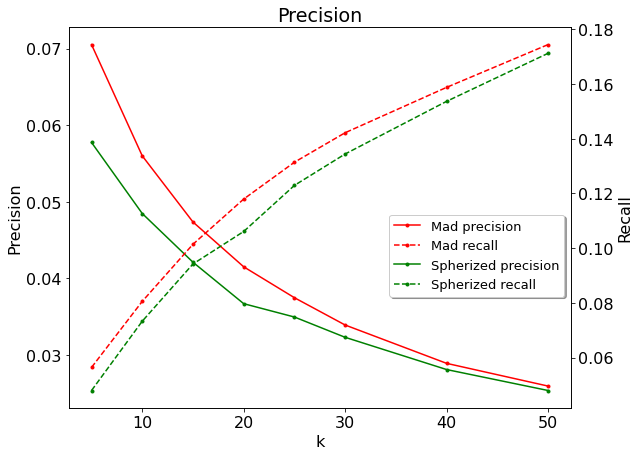

In [9]:
eval.plotting.prec_recall('Precision', fontsize= 13, index1=mad_pre, label_1="Mad", index2=sph_pre, label_2="Spherized")

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Average Precision@k and Recall@K")
ax2 = ax.twinx()
plt.xlabel('k')
ax.set_ylabel('Precision')
ax2.set_ylabel('Recall')


ax.plot(mad_pre["k"], mad_pre["precision"], color="green", label = 'Mad precision')
ax2.plot(mad_pre["k"], mad_pre["recall"], linestyle='dashdot', color="g", label = 'Mad recall')
ax.plot(sph_pre["k"], sph_pre["precision"], color="r", label = 'Spherized precision')
ax2.plot(sph_pre["k"], sph_pre["recall"],linestyle='dashdot', color="red", label = 'Spherized recall')

# plt.legend(loc = 'center right', shadow=True)
ax.legend(loc = 'lower center', shadow=True)
ax2.legend(loc = 'upper center', shadow=True)

plt.show()




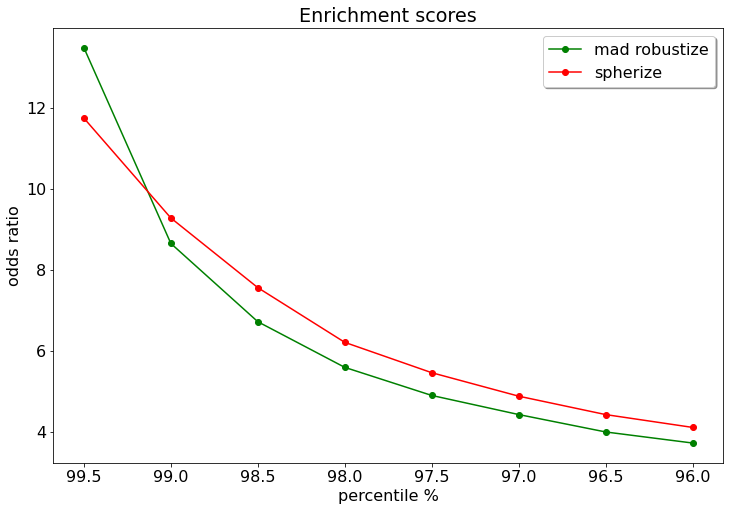

In [36]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Enrichment scores")
plt.plot(100*mad_enr["enrichment_percentile"], mad_enr["ods_ratio"], marker="o", color="g", label = 'mad robustize')
plt.plot(100*sph_enr["enrichment_percentile"], sph_enr["ods_ratio"], marker="o", color="r", label = 'spherize')
plt.ylabel('odds ratio')
plt.xlabel('percentile %')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

NameError: name 'mad_enr' is not defined

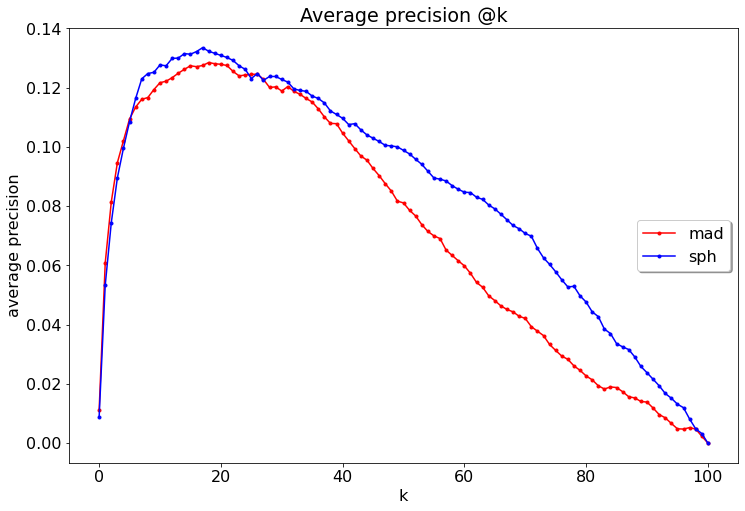

In [42]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(mad_hit, marker=".", color="r", label = 'mad')
plt.plot(sph_hit, marker=".", color="b", label = 'sph')
# plt.plot(sph_pre["k"], sph_pre["precision"], marker="o", color="r", label = 'sph')
# plt.plot(sph_pre["k"], sph_pre["recall"], marker="o", color="red")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

In [51]:
mad_pre.to_csv('../plot_storage/baseline_calc_mad_pre.csv')
pd.DataFrame(mad_hit).to_csv('../plot_storage/baseline_calc_mad_hit.csv')
mad_enr.to_csv('../plot_storage/baseline_calc_mad_enr.csv')
sph_pre.to_csv('../plot_storage/baseline_calc_sph_pre.csv')
pd.DataFrame(sph_hit).to_csv('../plot_storage/baseline_calc_sph_hit.csv')
sph_enr.to_csv('../plot_storage/baseline_calc_sph_enr.csv')

In [45]:
sph_pre_r = 0.056404115953036016
mad_pre_r = 0.06703344559051595

0.06703344559051595

,0
0,0.011022
1,0.060822
2,0.081463
3,0.094689
4,0.102104
...,...
96,0.004709
97,0.005210
98,0.004709
99,0.002305


In [3]:
df = pd.read_csv('2016_04_01_a549_48hr_batch1_consensus_median_feature_select_dmso.csv.gz')
df = ds.clean_moas(df)
features = infer_cp_features(df)
meta_features = infer_cp_features(df, metadata=True)
e = eval.evaluation(df, features=features, meta_features=meta_features)
mad_enr = e.eval(df, operation = 'enrichment')



,enrichment_percentile,threshold,ods_ratio,p-value
0,0.995,1.000000,1.132180,0.195369
1,0.990,0.999999,1.104486,0.162796
2,0.985,0.998613,1.125390,0.072562
3,0.980,0.992593,1.209322,0.002643
4,0.975,0.977786,1.219116,0.000568
5,0.970,0.943650,1.211901,0.000287
6,0.965,0.902152,1.237621,0.000017
7,0.960,0.831741,1.252234,0.000001
